# Predicting the price of Airbnb listings in Amsterdam

## 1. [Import Libraries and Load the Data](#1)
## 2. [Data Preparation](#2)
   #### 2.1 [Exploration, getting a feel for  DATA](#2.1)
   #### 2.2 [Investigate Numerical variables](#2.2)
   #### 2.3 [Investigate categorical variables](#2.3)
## 3. [Analysis: Classic ML models](#3)
   #### 3.1. [Ridge Regression](#3.1)
   #### 3.2. [Lasso Regression](#3.2)
   #### 3.3. [Random Forest Regression](#3.3)
   #### 3.4. [K Nearest Neighbors Regression](#3.4)
   #### 3.5. [Choose the best ML model](#3.5)
## 4. [Bonus: Neural Networks](#4)


<a name="1"></a>
### 1.1 Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pprint 
from pprint import pprint
import time

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [4]:
# Lets compare classic ML methods for regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [5]:
# import TensorFlow and Keras for the Nueral Networks section

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error 

from sklearn.model_selection import KFold

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = DeprecationWarning)

Using TensorFlow backend.


### 1.2 Load the Data

In [4]:
## Load Data 
## data can be accessed through this link: http://insideairbnb.com/get-the-data.html
data = pd.read_csv('Austin_listings.csv.gz', compression = 'gzip', low_memory=False,
                   error_bad_lines = False)
print('data shape is: ', data.shape)

data shape is:  (10321, 106)


<a name="2"></a>
## 2. Data Preparation

<a name="2.1"></a>
### 2.1. Exploration, getting a feel for  DATA

In [5]:
# There are 106 variables in the data set.
pd.set_option('display.max_columns', None)
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20200719161413,2020-07-20,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,A 2013 Genuine Buddy Scooter 125 may be availa...,5 min walk to Capitol Metro Rail (train that t...,"Several local restaurants, small clubs, music ...","Depending on your dates and arrival time, I am...",• Check-in time is 4 pm. Check out is 11 am. I...,NaN,NaN,https://a0.muscache.com/im/pictures/4740524/63...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX, United States",East Downtown,78702,NaN,Austin,TX,78702.0,Austin,"Austin, TX",US,United States,30.27750,-97.71398,f,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$225.00,NaN,NaN,$500.00,$100.00,4,$30.00,30,90,30,30,90,90,30.0,90.0,12 months ago,t,0,0,0,0,2020-07-20,24,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,f,NaN,"{""Texas State""}",f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20200719161413,2020-07-19,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,"This green, colorful, clean and cozy house was...",Situated in a vibrant & diverse multicultural ...,none,NaN,Please note: A two story studio was built in t...,NaN,NaN,"I should be available, upon your arrival, to a...",A brief profile for all guests along with phot...,NaN,NaN,https://a0.muscache.com/im/pictures/5167505/b3...,NaN,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a day,100%,100%,t,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Austin, TX,

### Let's see which variables have too many missing values to be useful & Keep features that are more important for estimating the listing price

In [6]:
# Count null values for each feature
pd.set_option('display.max_rows', None)
data.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
summary                                           365
space                                            2333
description                                       179
experiences_offered                                 0
neighborhood_overview                            3395
notes                                            5523
transit                                          3835
access                                           4174
interaction                                      3391
house_rules                                      3463
thumbnail_url                                   10321
medium_url                                      10321
picture_url                                         0
xl_picture_url              

### Variable Selection Process:
#### a) 'notes', 'transit', 'access', 'interaction', and 'house rules': 1. have a lot of missing values 2. require more data preprocessing and don't seem as quite important as some other variables so I drop them
#### b) Among host features, I keep the ones that seems more important such as 'host response rate' or 'host is superhost'
#### c) 'square_feet' should be informative but more than 90% of the data is missing so not useful
#### d) There are 8 variables regarding the minimum and maximum nights, I think the most important one is minimum_nights
#### e) Number of reviews is important and I keep 'number_of_reviews_ltm' as I think it is the number of the reviews in the last month
#### f) 'review_scores_rating' seems to be an aggregate of all other reviews and will be included in the data

In [7]:
# 25 variables (including price and availability) are kept in the data set, I look into them in detail
data1 = data[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_identity_verified',
            'neighbourhood','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
            'bed_type','amenities','security_deposit','cleaning_fee','guests_included','extra_people',
            'minimum_nights','calendar_updated','number_of_reviews_ltm','review_scores_rating',
            'instant_bookable','cancellation_policy','reviews_per_month','has_availability','price']]
pd.set_option('display.max_rows', None)
print(data1.dtypes)
data1.head(10)

host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_identity_verified     object
neighbourhood              object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
amenities                  object
security_deposit           object
cleaning_fee               object
guests_included             int64
extra_people               object
minimum_nights              int64
calendar_updated           object
number_of_reviews_ltm       int64
review_scores_rating      float64
instant_bookable           object
cancellation_policy        object
reviews_per_month         float64
has_availability           object
price                      object
dtype: object


,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,calendar_updated,number_of_reviews_ltm,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,has_availability,price
0,100%,100%,t,t,East Downtown,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$500.00,$100.00,4,$30.00,30,12 months ago,0,93.0,f,strict_14_with_grace_period,0.17,t,$225.00
1,100%,100%,t,t,East Downtown,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$500.00,$75.00,2,$35.00,30,13 months ago,0,91.0,f,strict_14_with_grace_period,0.07,t,$100.00
2,100%,95%,t,t,East Downtown,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",$100.00,$65.00,2,$45.00,2,4 months ago,42,96.0,f,strict_14_with_grace_period,3.86,t,$95.00
3,60%,NaN,f,f,Bouldin Creek,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$100.00,$100.00,1,$0.00,30,17 months ago,0,95.0,t,strict_14_with_grace_period,0.15,t,$55.00
4,NaN,100%,t,t,SW Williamson Co.,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,NaN,2,$0.00,1,3 months ago,7,98.0,f,moderate,2.05,t,$40.00
5,100%,100%,t,f,Travis Heights,Guesthouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$0.00,$0.00,2,$0.00,30,3 months ago,17,99.0,t,strict_14_with_grace_period,0.87,t,$99.00
6,90%,100%,t,t,Zilker,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$200.00,$0.00,2,$25.00,3,4 months ago,22,99.0,t,moderate,2.15,t,$139.00
7,22%,86%,f,f,East Riverside,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$0.00,$85.00,2,$5.00,3,5 months ago,0,92.0,f,strict_14_with_grace_period,0.36,t,$40.00
8,100%,65%,f,t,NaN,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",$200.00,$100.00,1,$0.00,1,5 months ago,3,99.0,f,strict_14_with_grace_period,0.36,t,$300.00
9,100%,100%,t,t,Travis Heights,House,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$0.00,$80.00,5,$0.00,1,7 weeks ago,11,98.0,t,moderate,1.07,t,$550.00


<a name="2.2"></a>
### 2.2. Investigate Numerical variables
#### 2.2.1 [Start with "price" as outcome of intererst](#2.2.1)

#### 2.2.2 [Convert the variables that are actually numerical but are recorded as object](#2.2.2)

#### 2.2.3 [Find variables thet are correlated and remove the unneeded ones](#2.2.3)

#### 2.2.4 [Check numerical vars and modify](#2.2.4)

### 2.2.1

In [8]:
# price as outcome, let's remove the '$' sign and covnert it to numeric

data1.loc[:,'price'] = pd.to_numeric(data1.loc[:,'price'].str.replace('[^\d.]', ''), errors = 'coerce')
data1.loc[:,'price'] = data1.loc[:,'price'].replace(np.nan, 0) # There is no missing value actually

#### Exploring plotly library

In [9]:
#pip install cufflinks plotly
#conda install -c plotly plotly chart-studio

In [10]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

### Histogram of price
     data is very skewed
     There are obviously outliers in the data

In [11]:
# Look at the Price data that we want to predict 
print (data1['price'].describe())

# min of zero is strange, there are only 3 listings, so probably an error
# put it equal to median of price
data1.loc[data1['price'] == 0 , 'price'] = data1['price'].median()
print('skew of price:', data1['price'].skew())


# data1['price'].plot(kind='hist', figsize=(8, 6), bins=50)
# plt.show()

# Use plotly
data1['price'].iplot(kind = 'hist', xTitle = 'Price',
                  yTitle = 'count', title = 'Price Distribution')

count    10321.000000
mean       434.504312
std       1319.663369
min          0.000000
25%         80.000000
50%        149.000000
75%        300.000000
max      15299.000000
Name: price, dtype: float64
skew of price: 6.570028837832406


In [12]:
# Percentiles can help here
print(np.percentile(data1['price'], (90, 95, 97, 99, 99.5, 99.7, 99.9, 99.95, 99.99)))

# Anything above 97 percentile ($1820) is set equal to 1820
maxedprice = round(np.percentile(data1['price'], (97)), 2)

data1['maxed_price'] = data1['price']
data1.loc[data1['price'] >= maxedprice, 'maxed_price'] = maxedprice

print('skew of price:', data1['maxed_price'].skew())

#data1['maxed_price'].plot(kind='hist', figsize=(8, 6), bins=200)
#plt.show()

# histogram still has long right tail but it is much better than the above
data1['maxed_price'].iplot(kind = 'hist', xTitle = 'Price',
                  yTitle = 'count', title = 'Price Distribution')


[  650.  1086.  1820. 10000. 10000. 10000. 10000. 10000. 10000.]
skew of price: 2.762275202126523


### This is still too skewed for regression let's try log transformation of the 'original price'!
#### looks good enough to proceed although there are still some outliers

In [13]:
data1['log_price'] = np.log(data1['price'])
print('skew of price:', data1['log_price'].skew())

data1['log_price'].iplot(kind = 'hist', xTitle = 'Log_Price',
                  yTitle = 'count', title = 'Log of Price Distribution')

skew of price: 0.9787380536715227


### Checking QQ plot for Normality assumption

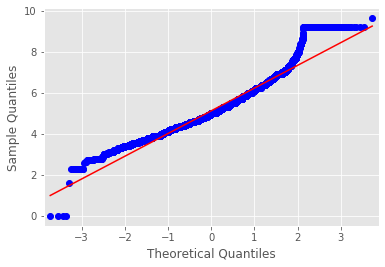

In [14]:
# QQ plot doesn't seem normal, we can address this by removing very small and large values
from statsmodels.graphics.gofplots import qqplot
qqplot_data = qqplot(data1['log_price'], line = 's').gca().lines

#OR
#import pylab 
#import scipy.stats as stats
#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
#stats.probplot(data1['log_price'], dist="norm", plot=pylab)
#pylab.show()

## 'Data2' is created here

In [15]:
# remove values below 1 % and above 99%, about 300 data points 
print('original data shape:', data1.shape)

lower = np.percentile(data1['log_price'], (1))

upper = np.percentile(data1['log_price'], (99))

filt = lambda x: (x > lower) and (x < upper)

data2 = data1[data1['log_price'].apply(filt)]  

print('trimmed data shape:', data2.shape)

original data shape: (10321, 28)
trimmed data shape: (10031, 28)


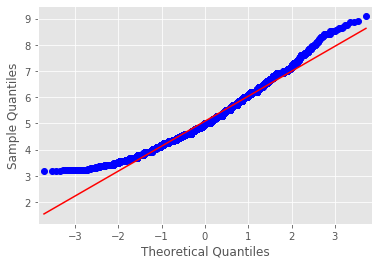

In [16]:
# letss look at QQ plot again, it should be a little better
qqplot_data = qqplot(data2['log_price'], line = 's').gca().lines

### This looks fine for a linear regression model, hower we are going to use other ML models that are not afftected by deviation from normality or linearity, so if not only restricted to linear models, then we can ignore most of the steps we did above

In [17]:
data2['log_price'].iplot(kind = 'hist', xTitle = 'Log_Price',
                  yTitle = 'count', title = 'Log of Price Distribution')

#### Scatter plot of log price based on guests included

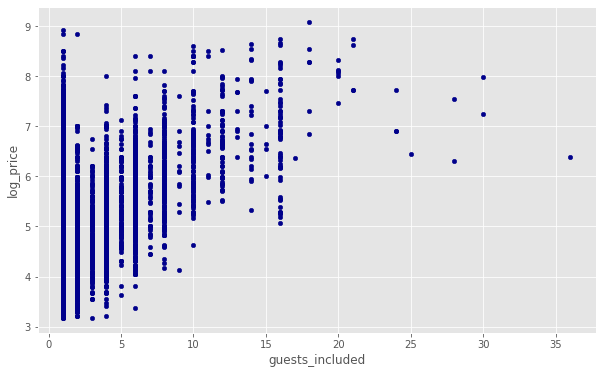

In [18]:
data2.plot(kind = 'scatter', x = 'guests_included', y = 'log_price', figsize = (10, 6), color = 'darkblue')
plt.show()

 <a name="2.2.2"></a>
 ### 2.2.2 Convert the variables that are actually numerical but are recorded as object

In [19]:
# Convert host_response_rate, host_acceptance_rate, security_deposit, cleaning_fee, and extra_people to numeric
col = ['host_response_rate', 'host_acceptance_rate', 'security_deposit', 'cleaning_fee', 'extra_people']

# Below code remove anything ('$','%',...) other than numbers from the values
convert_to_numeric = lambda x:  pd.to_numeric(x.str.replace('[^\d.]', ''), errors = 'coerce')
data2[col] = data2[col].apply(convert_to_numeric, axis=1)

# I believe we can replace missing values in these columns with zero
NANto0 = lambda x:  x.replace(np.nan, 0)
data2[col] = data2[col].apply(NANto0, axis = 1)

data2[col].head()

,host_response_rate,host_acceptance_rate,security_deposit,cleaning_fee,extra_people
0,100.0,100.0,500.0,100.0,30.0
1,100.0,100.0,500.0,75.0,35.0
2,100.0,95.0,100.0,65.0,45.0
3,60.0,0.0,100.0,100.0,0.0
4,0.0,100.0,0.0,0.0,0.0


<a name="2.2.3"></a>
###  2.2.3 Find variables thet are correlated and remove the unneeded ones 

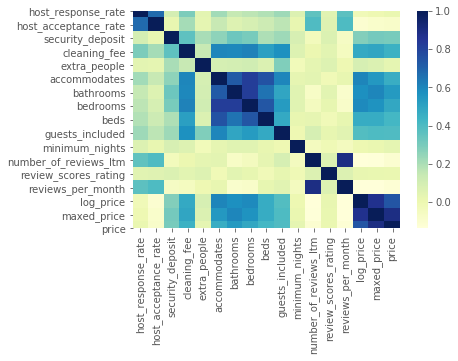

In [20]:
# Make a heatmap
corr = data2[['host_response_rate','host_acceptance_rate','security_deposit','cleaning_fee','extra_people','accommodates',
              'bathrooms','bedrooms','beds','guests_included','minimum_nights',
              'number_of_reviews_ltm','review_scores_rating','reviews_per_month', 'log_price', 'maxed_price','price']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

In [21]:
# Heatmap shows areas of concern, lets look at the exact numbers
corr

,host_response_rate,host_acceptance_rate,security_deposit,cleaning_fee,extra_people,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews_ltm,review_scores_rating,reviews_per_month,log_price,maxed_price,price
host_response_rate,1.000000,0.681082,0.100043,0.293883,0.041743,0.219990,0.147119,0.165298,0.188870,0.227175,0.066874,0.356876,0.050537,0.364314,-0.022250,-0.003015,0.017204
host_acceptance_rate,0.681082,1.000000,0.023013,0.215798,0.037543,0.145958,0.064701,0.088767,0.128007,0.167937,0.024538,0.397613,0.061420,0.402844,-0.103962,-0.086269,-0.077052
security_deposit,0.100043,0.023013,1.000000,0.360337,0.207372,0.260791,0.331823,0.304517,0.198534,0.230093,0.085798,-0.032407,0.072083,-0.061033,0.281420,0.315238,0.306163
cleaning_fee,0.293883,0.215798,0.360337,1.000000,0.142409,0.603587,0.599595,0.613742,0.517027,0.569213,0.066146,0.011602,0.046404,-0.047135,0.483835,0.495558,0.451270
extra_people,0.041743,0.037543,0.207372,0.142409,1.000000,0.095288,0.102589,0.115063,0.074395,0.288488,-0.025609,0.036670,0.063770,-0.000374,0.092441,0.071608,0.039443
accommodates,0.219990,0.145958,0.260791,0.603587,0.095288,1.000000,0.726299,0.825696,0.751662,0.600101,0.031330,0.042259,-0.015596,0.025739,0.604721,0.546265,0.463871
bathrooms,0.147119,0.064701,0.331823,0.599595,0.102589,0.726299,1.000000,0.823578,0.656116,0.497622,0.055512,-0.066965,0.048058,-0.093533,0.576934,0.602247,0.540602
bedrooms,0.165298,0.088767,0.304517,0.613742,0.115063,0.825696,0.823578,1.000000,0.740697,0.534780,0.054313,-0.041688,0.026984,-0.077281,0.592082,0.567450,0.488191
beds,0.188870,0.128007,0.198534,0.517027,0.074395,0.751662,0.656116,0.740697,1.000000,0.483987,0.024792,0.034849,-0.019139,0.029219,0.469155,0.467977,0.425884
guests_included,0.227175,0.167937,0.230093,0.569213,0.288488,0.600101,0.497622,0.534780,0.483987,1.000000,-0.001504,0.091516,0.028257,0.052231,0.388579,0.402241,0.396697


####  a) According to the above table 'host_response_rate' and 'host_acceptance_rate' are correlated and I will keep the 'host_acceptance_rate' because it has a higher variation and therefore probably more informative
#### b) 'accommodates', 'guests_included, 'bedrooms', 'bathrooms', and 'beds' are all correlated, I only keep the 'accommodates' because it has higher correlation with 'log_price', although not with 'price' and 'maxed_price'
#### c) Also 'number_of_reviews_ltm' and 'reviews_per_month' are almost the same variables and I keep the 'number_of_reviews_ltm' since it doesn't have missing values 

In [22]:
data2 = data2.drop(['host_response_rate','guests_included','bathrooms', 'bedrooms', 'beds','reviews_per_month'], axis=1)

<a name="2.2.4"></a>
### 2.2.4 Check  numerical vars and modify 

In [23]:
# Missing values should be addressed first
data2[['host_acceptance_rate', 'accommodates',  'security_deposit', 'cleaning_fee','extra_people',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating','price', 'maxed_price']].isnull().sum()

host_acceptance_rate        0
accommodates                0
security_deposit            0
cleaning_fee                0
extra_people                0
minimum_nights              0
number_of_reviews_ltm       0
review_scores_rating     2401
price                       0
maxed_price                 0
dtype: int64

In [24]:
# Replace the missing reviews score with the minimum score, although it might not be fair
data2["review_scores_rating"].fillna(data2["review_scores_rating"].min(), inplace = True) 

data2[['host_acceptance_rate', 'accommodates', 'security_deposit', 'cleaning_fee','extra_people',
       'minimum_nights', 'number_of_reviews_ltm', 'review_scores_rating','price', 'maxed_price']].describe()

,host_acceptance_rate,accommodates,security_deposit,cleaning_fee,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,price,maxed_price
count,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000
mean,63.212441,4.693251,219.961021,72.867112,13.037783,7.303958,8.864420,77.952846,277.893231,258.983750
std,43.947397,3.238064,515.691693,90.108113,26.753210,38.574536,16.677139,33.113844,458.906214,316.977417
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,24.000000,24.000000
25%,0.000000,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,73.000000,80.000000,80.000000
50%,92.000000,4.000000,0.000000,50.000000,0.000000,2.000000,1.000000,97.000000,148.000000,148.000000
75%,100.000000,6.000000,250.000000,100.000000,20.000000,3.000000,11.000000,100.000000,300.000000,300.000000
max,100.000000,33.000000,5100.000000,1042.000000,500.000000,1000.000000,312.000000,100.000000,8880.000000,1820.000000


#### ALmost all features including 'minimum_nights', and 'number_of_reviews_ltm' have maximum value that seems out of range, e.g. minimum stay of 1000 days
#### Box plots show that these variables are very skewed to the right

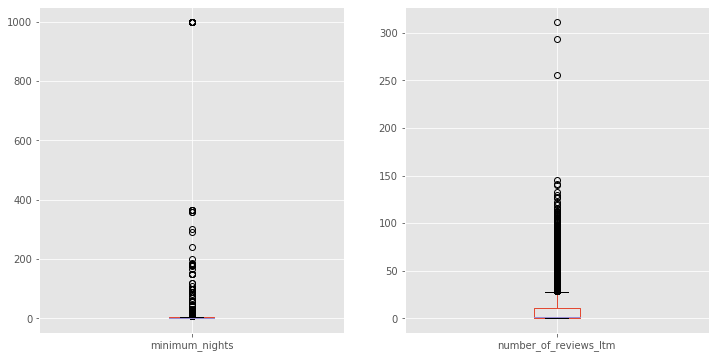

In [25]:
plt.subplot(1, 2, 1)
data2['minimum_nights'].plot(kind = 'box',figsize = (12, 6) )

plt.subplot(1, 2, 2)
data2['number_of_reviews_ltm'].plot(kind = 'box', figsize = (12, 6))

plt.show()

# So I substitute any value greater than 99 percentile in these variables to be equal to the 99 percentile value 

### Replace extreme values with x percentile of data

In [26]:
def to_x_percentile(data, column, x):
    for col in column:
        #newcol='{}'.format(col)
        maxed = round(np.percentile(data[col], x), 2)
        data.loc[data[col] > maxed, col] = maxed

# run the function on columns of data 
col = ['accommodates', 'security_deposit', 'cleaning_fee','extra_people','minimum_nights','number_of_reviews_ltm']
to_x_percentile(data2, col, 99)
data2[col].describe()

,accommodates,security_deposit,cleaning_fee,extra_people,minimum_nights,number_of_reviews_ltm
count,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000
mean,4.676503,206.064201,70.877280,12.242349,5.746386,8.624434
std,3.153742,414.235695,77.920623,21.381112,12.771084,15.035186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000
50%,4.000000,0.000000,50.000000,0.000000,2.000000,1.000000
75%,6.000000,250.000000,100.000000,20.000000,3.000000,11.000000
max,16.000000,2500.000000,395.000000,100.000000,90.000000,77.700000


In [27]:
# This is a method to remove outliers but I don't like it as I don't think the results make sense here
# from sklearn import svm
# def get_outliners(y, outliers_fraction=0.25):
    #clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)
    #clf.fit(y)
    #result = clf.predict(y)
    #return result
# This will return – 1 for outliers and 1 for non-outliers. Then you can do something like this:
# training_dataset = full_dataset[get_outliners(full_dataset[analytics_fields_with_price], 0.15)==1]

<a name="2.3"></a>
### 2.3. Investigate categorical variables
#### 2.3.1 [Convert binary features to 0 and 1](#2.3.1)
#### 2.3.2 [Address variables with more than two categories](#2.3.2)

## 'Data3' is created here

In [28]:
# Make a new copy of data set
import copy
data3 = copy.deepcopy(data2)
data3.isnull().sum()
# Note. Missing neighborhood can be filled in using zipcode

host_acceptance_rate        0
host_is_superhost           2
host_identity_verified      2
neighbourhood             777
property_type               0
room_type                   0
accommodates                0
bed_type                    0
amenities                   0
security_deposit            0
cleaning_fee                0
extra_people                0
minimum_nights              0
calendar_updated            0
number_of_reviews_ltm       0
review_scores_rating        0
instant_bookable            0
cancellation_policy         0
has_availability            0
price                       0
maxed_price                 0
log_price                   0
dtype: int64

<a name="2.3.1"></a>
### 2.3.1. Convert True, False values to 1 and 0 

In [29]:
TF_to_one_zero = lambda x: 1 if x=='t' else 0
data3[['host_is_superhost','host_identity_verified','has_availability','instant_bookable']]=data3[['host_is_superhost','host_identity_verified','has_availability','instant_bookable']].applymap(TF_to_one_zero)

 <a name="2.3.2"></a>
 ### 2.3.2 Categorical variables with multiple groups, these variables need more investigation

In [30]:
# neighborhood

# Put neighborhoods less than 5% into one group
Frq = data3.neighbourhood.value_counts(normalize=True)

# Create a new variable based on frequency of each neighborhood in data
data3.loc[:,'neighbor_percent'] = data3['neighbourhood'].map(Frq)
data3.loc[data3['neighbor_percent'] < 0.03, 'neighbourhood'] = 'other_neigh' # 0.03 is just a random number

# replace missing neighborhoods with 'other_neigh' as well
data3.loc[:,'neighbourhood'] = data3['neighbourhood'].replace(np.nan, 'other_neigh')
data3.drop(['neighbor_percent'], axis = 1, inplace = True)

In [31]:
# property_type 
# There are many property types, I think I can put them under 3 groups of apartment, house, and other
# Make some changes first

data3.loc[data3['property_type'].isin(['Townhouse','Guesthouse']), 'property_type'] = 'House'
data3.loc[data3['property_type'].isin(['Condominium','Aparthotel']), 'property_type'] = 'Apartment'
data3.loc[~data3['property_type'].isin(['Apartment','House']), 'property_type'] = 'other_property_type'

In [32]:
# room_type 
# There are 4 types of rooms types, Entire home, private room, and shared room, I'll consider the 'Hotel room' as private room

data3.loc[data3['room_type'] == 'Hotel room', 'room_type'] = 'Private room'

In [33]:
# bed type
# 99% of listings are real bed, but since it seems like an important feature, let's call the rest 'other bed'

data3.loc[data3['bed_type'] != 'Real Bed', 'bed_type'] = 'other bed'

In [34]:
# Cancelation policy
# has 7 levels, I combined them into three groups

data3.loc[data3['cancellation_policy'].isin(['super_strict_30','super_strict_60','luxury_moderate',
                                             'luxury_super_strict_95','strict_14_with_grace_period']),
          'cancellation_policy'] = 'strict'

In [35]:
# make dummy variables for 5 variables

def MakeDummy(df, colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col])
            df = pd.concat([df, dummies], axis = 1)

            #drop the encoded column
            df.drop([col], axis = 1 , inplace = True)
            # drop the last column created which is the last or 'other' category 
            df.drop(df.columns[-1], axis = 1, inplace = True)
    return df

data3 = MakeDummy(data3,['neighbourhood','property_type','room_type','bed_type','cancellation_policy'])

###  calendar_updated variable is categorical but better to be converted to numeric

In [36]:
data3.calendar_updated.value_counts(dropna=False).nlargest(10)

2 months ago     2123
4 months ago     1163
5 months ago     1005
7 weeks ago       720
3 months ago      475
never             384
6 months ago      377
10 months ago     282
9 months ago      220
8 months ago      203
Name: calendar_updated, dtype: int64

In [37]:
# For 'calendar_updated' feature, I converted all values to multipliers of week, and anything less than a week is considered 1.
import re
import string
word_list = ['day','week','month']

# create two new variables, number is the numeric part, and EXTRACT is the day, week, month identifier
data3.loc[:,'number'] = pd.to_numeric(data3['calendar_updated'].str.replace('[^\d.]', ''), errors='coerce')
data3['EXTRACT'] = data3['calendar_updated'].str.extract('({})'.format('|'.join(word_list)), 
                        flags = re.IGNORECASE, expand=False).str.lower().fillna('')

# based on what is created, number is multiplied by a value representing number of weeks 
data3.loc[data3['EXTRACT'].isin(['day']), 'calendar_update'] = 1 # anything that include "days" will be considered 1 week

data3.loc[data3['EXTRACT'].isin(['week']), 'calendar_update'] = 1 * data3['number'] # anything between '2 weeks' and '7 weeks'
data3.loc[ data3['number'].isin(['NaN']) & data3['EXTRACT'].isin(['week']), 'calendar_update'] = 1 # only to address 'a week ago'

data3.loc[data3['EXTRACT'].isin(['month']), 'calendar_update'] = 4 * data3['number'] # for '2 months ago' and beyond

# For 'never' value only: put it equal to maximum value
data3.loc[data3['calendar_updated'].isin(['never']), 'calendar_update'] = data3['calendar_update'].max()
data3.drop(['calendar_updated','EXTRACT','number'], axis = 1, inplace = True)

# I think Big values reduce the importance of this variable for smaller values, a calendar update under a week is very important
# So let's maxout this variable to 9 weeks
data3.loc[data3['calendar_update'] >= 9, 'calendar_update'] = 9
data3.head()

,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,amenities,security_deposit,cleaning_fee,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,has_availability,price,maxed_price,log_price,Bouldin Creek,Downtown,East Downtown,East Riverside,South Lamar,Travis Heights,University of Texas,Zilker,Apartment,House,Entire home/apt,Private room,Real Bed,flexible,moderate,calendar_update
0,100.0,1,1,4.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,100.0,30.0,30.0,0.0,93.0,0,1,225.0,225.0,5.416100,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,9.0
1,100.0,1,1,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,75.0,35.0,30.0,0.0,91.0,0,1,100.0,100.0,4.605170,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,9.0
2,95.0,1,1,3.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",100.0,65.0,45.0,2.0,42.0,96.0,0,1,95.0,95.0,4.553877,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,9.0
3,0.0,0,0,2.0,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",100.0,100.0,0.0,30.0,0.0,95.0,1,1,55.0,55.0,4.007333,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,9.0
4,100.0,1,1,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,0.0,0.0,1.0,7.0,98.0,0,1,40.0,40.0,3.688879,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,9.0


### Last but not least: There are many different types of amenities, each of them separately might not be a big factor for price, but maybe in overall more expensive listings offer more amenities.

In [38]:
# example of amenities
pd.set_option('display.max_colwidth', -1)
data3[['amenities']].iloc[0:3]

,amenities
0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",""Paid parking off premises"",Breakfast,""Pets live on this property"",Dog(s),""Free street parking"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke alarm"",""Carbon monoxide alarm"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop-friendly workspace"",""Self check-in"",Lockbox,""Private entrance"",""Hot water"",""Bed linens"",""Extra pillows and blankets"",Microwave,""Coffee maker"",Refrigerator,""Dishes and silverware"",""Cooking basics"",Oven,Stove,""Garden or backyard""}"
1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning"",Kitchen,""Free parking on premises"",Breakfast,""Pets live on this property"",Dog(s),""Free street parking"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke alarm"",""Carbon monoxide alarm"",Essentials,Shampoo,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop-friendly workspace"",""Hot water"",""Luggage dropoff allowed"",Other}"
2,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live on this property"",Dog(s),Cat(s),""Free street parking"",Heating,""Family/kid friendly"",""Smoke alarm"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Private entrance"",""Hot water"",""Bed linens"",""Extra pillows and blankets"",Microwave,""Coffee maker"",Refrigerator,""Dishes and silverware"",""Patio or balcony"",""Garden or backyard"",""Luggage dropoff allowed"",""Long term stays allowed"",""Host greets you""}"


### Get an "approximate" number of amenities for each listing by counting the number of ',' 

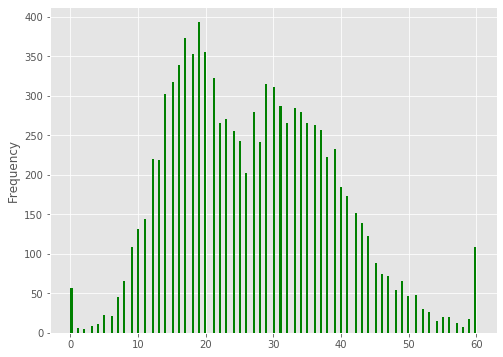

In [39]:
data3['amenities_count'] = data3['amenities'].str.count(',')

# max the amenities to 99 percentile
to_x_percentile(data3, ['amenities_count'], 99)

data3['amenities_count'].plot(kind = 'hist', figsize = (8, 6), bins = 200, color = 'green')

data3.drop('amenities', axis=1, inplace=True)

plt.show()

In [40]:
data3.describe()

,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,security_deposit,cleaning_fee,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,has_availability,price,maxed_price,log_price,Bouldin Creek,Downtown,East Downtown,East Riverside,South Lamar,Travis Heights,University of Texas,Zilker,Apartment,House,Entire home/apt,Private room,Real Bed,flexible,moderate,calendar_update,amenities_count
count,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.0,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000,10031.000000
mean,63.212441,0.357791,0.453694,4.676503,206.064201,70.877280,12.242349,5.746386,8.624434,77.952846,0.477619,1.0,277.893231,258.983750,5.083649,0.031403,0.067092,0.092713,0.028412,0.028013,0.036188,0.033696,0.030805,0.331572,0.544711,0.759545,0.233077,0.989732,0.315721,0.259097,8.607915,27.059017
std,43.947397,0.479374,0.497876,3.153742,414.235695,77.920623,21.381112,12.771084,15.035186,33.113844,0.499524,0.0,458.906214,316.977417,0.952824,0.174412,0.250194,0.290044,0.166155,0.165019,0.186767,0.180453,0.172796,0.470802,0.498022,0.427381,0.422812,0.100815,0.464826,0.438161,0.759449,11.622206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.0,24.000000,24.000000,3.178054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,73.000000,0.000000,1.0,80.000000,80.000000,4.382027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.000000,18.000000
50%,92.000000,0.000000,0.000000,4.000000,0.000000,50.000000,0.000000,2.000000,1.000000,97.000000,0.000000,1.0,148.000000,148.000000,4.997212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.000000,26.000000
75%,100.000000,1.000000,1.000000,6.000000,250.000000,100.000000,20.000000,3.000000,11.000000,100.000000,1.000000,1.0,300.000000,300.000000,5.703782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,35.000000
max,100.000000,1.000000,1.000000,16.000000,2500.000000,395.000000,100.000000,90.000000,77.700000,100.000000,1.000000,1.0,8880.000000,1820.000000,9.091557,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,60.000000


### EXPORT data as CSV

In [556]:
data3.to_csv(r'C:\Users\kiz4774\OneDrive - Baylor Scott & White Health\BACKup May 2019\ALL DEsktop FILES\PY\Interview Questions\Pathrise_challenge\Airbnb_Austin_cleaned_data.csv',  index=False)

<a name="3"></a>
## 3. Classic ML MODELS

## 'Data4' is created here

In [6]:
# Import data
data4 = pd.read_csv(r'C:\Users\kiz4774\OneDrive - Baylor Scott & White Health\BACKup May 2019\ALL DEsktop FILES\PY\Interview Questions\Pathrise_challenge\Airbnb_Austin_cleaned_data.csv')
data4.head()

,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,security_deposit,cleaning_fee,extra_people,minimum_nights,number_of_reviews_ltm,review_scores_rating,...,Zilker,Apartment,House,Entire home/apt,Private room,Real Bed,flexible,moderate,calendar_update,amenities_count
0,100.0,1,1,4.0,500.0,100.0,30.0,30.0,0.0,93.0,...,0,0,1,1,0,1,0,0,9.0,37.0
1,100.0,1,1,2.0,500.0,75.0,35.0,30.0,0.0,91.0,...,0,0,1,0,1,1,0,0,9.0,26.0
2,95.0,1,1,3.0,100.0,65.0,45.0,2.0,42.0,96.0,...,0,0,1,1,0,1,0,0,9.0,28.0
3,0.0,0,0,2.0,100.0,100.0,0.0,30.0,0.0,95.0,...,0,1,0,1,0,1,0,0,9.0,19.0
4,100.0,1,1,2.0,0.0,0.0,0.0,1.0,7.0,98.0,...,0,0,1,0,1,1,0,1,9.0,21.0


### Which categorical variables better divide the price?
#### 'log_price' gives a better understanding here

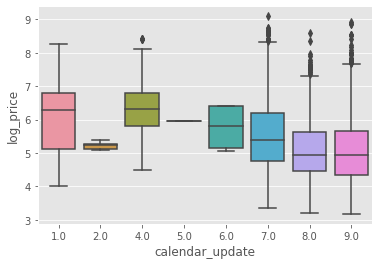

In [7]:
sns.boxplot(x = 'calendar_update', y = 'log_price',  data = data4)
plt.show()
# accommodates, Entire home, private room, and real bed are important variables

### Which numerical variables has correlation with price?

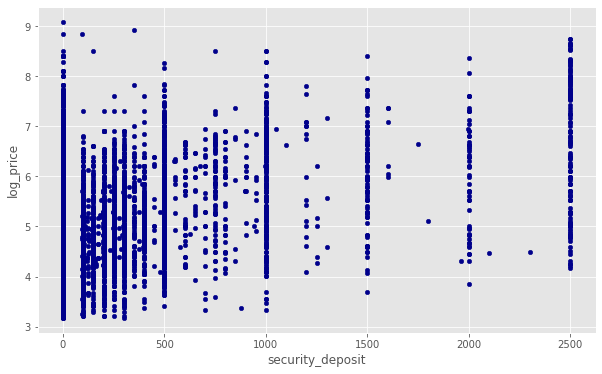

In [14]:
# We know 'cleaning fee' or 'security_deposit' are among them, maybe
data4.plot(kind = 'scatter', x = 'security_deposit', y = 'log_price', figsize = (10, 6), color = 'darkblue')
plt.show()

### Make 2 sets of data, one is short (in columns) with 8 features and one is with all independent varaibles

In [8]:
# Make a set of independent features
#data4=copy.deepcopy(data3)

# All variables included
X_long = data4.drop(['price','maxed_price','log_price'], axis = 1)
print('Shape of long dada: ', X_long.shape)
# A smaller subset of data with most important variables
X_short = data4[['accommodates','cleaning_fee','number_of_reviews_ltm','calendar_update','review_scores_rating','Entire home/apt','Private room','Real Bed']]
print('Shape of short data: ', X_short.shape)
# make outcome a separate value
y = data4['price']
y_log = data4['log_price']
y_maxed = data4['maxed_price']

Shape of long dada:  (10031, 29)
Shape of short data:  (10031, 8)


In [9]:
print(X_short.dtypes)
X_short.head()

accommodates             float64
cleaning_fee             float64
number_of_reviews_ltm    float64
calendar_update          float64
review_scores_rating     float64
Entire home/apt            int64
Private room               int64
Real Bed                   int64
dtype: object


,accommodates,cleaning_fee,number_of_reviews_ltm,calendar_update,review_scores_rating,Entire home/apt,Private room,Real Bed
0,4.0,100.0,0.0,9.0,93.0,1,0,1
1,2.0,75.0,0.0,9.0,91.0,0,1,1
2,3.0,65.0,42.0,9.0,96.0,1,0,1
3,2.0,100.0,0.0,9.0,95.0,1,0,1
4,2.0,0.0,7.0,9.0,98.0,0,1,1


In [17]:
# try this and see if the model becomes faster
X_short= X_short.astype('int32')
X_short.head()

,accommodates,cleaning_fee,number_of_reviews_ltm,calendar_update,review_scores_rating,Entire home/apt,Private room,Real Bed
0,4,100,0,9,93,1,0,1
1,2,75,0,9,91,0,1,1
2,3,65,42,9,96,1,0,1
3,2,100,0,9,95,1,0,1
4,2,0,7,9,98,0,1,1


## Make train and test data sets and standardize the data 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_short, y_maxed, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (8024, 8) (8024,)
Test set: (2007, 8) (2007,)


<a name="3.1"></a>
## 3.1. Ridge Regression
### Regressions are fast, we can start by Grid Search 

In [22]:
# Regularization strength; must be a positive float.
# Solver to use in the computational routines


# Create the Parameter grid
param_grid = {'alpha':  [ 1e-2, 1e-1, 1, 5, 10, 15],
               'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg',  'saga' ]}

ridge = Ridge(random_state = 42)
# search across all possible combinations

ridge_Grid = GridSearchCV(estimator = ridge, param_grid  = param_grid, cv = 4)

start_time = time.time()

# Fit the random search model
ridge_Grid.fit(X_train, y_train)

end_time = time.time()

print('best parameters are:', ridge_Grid.best_params_)
print('best r2 score is: {}'.format(ridge_Grid.best_score_))

ridge_best = ridge_Grid.best_estimator_
print ('best estimator: ', ridge_best)
print("--- training time is %s seconds ---" % (end_time - start_time))

best parameters are: {'alpha': 15, 'solver': 'sparse_cg'}
best r2 score is: 0.385641857343273
best estimator:  Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='sparse_cg', tol=0.001)
--- training time is 1.0139656066894531 seconds ---


### Evaluate performance on Test data set using Mean Square Error and R2

In [23]:
y_pred = ridge_best.predict(X_test)

print('test set MSE : %.4f'% mean_squared_error(y_test, y_pred))
print('test set r2 : %.4f' % r2_score( y_test, y_pred))

test set MSE : 62227.9287
test set r2 : 0.3798


<a name="3.2"></a>
## 3.2. Lasso Regression
### I used the LassoCV which does the cross validation and pick the best model

In [24]:
lasso_best = LassoCV(alphas=[1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5 ,10], cv=4, max_iter=5000, n_jobs=-1)

start_time = time.time()

lasso_best.fit (X_train, y_train)

end_time = time.time()

print('best alpha is:', lasso_best.alpha_)
print('best r2 score is: {}'.format(lasso_best.score(X_train, y_train)))
print("--- training time is %s seconds ---" % (end_time - start_time))

best alpha is: 1.0
best r2 score is: 0.388920055385899
--- training time is 0.11899733543395996 seconds ---


### Evaluate performance on Test data set using Mean Square Error and R2

In [25]:
y_pred = lasso_best.predict(X_test)

print('test set MSE : %.4f'% mean_squared_error(y_test, y_pred))
print('test set r2 : %.4f' % r2_score( y_test, y_pred))

test set MSE : 62204.5740
test set r2 : 0.3801


<a name="3.3"></a>
## 3.3. Random Forest
### Let's try Randomized Search because Grid Search would be slow
#### # This takes about 120 secs to run on X_short:

In [26]:
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 4)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state=42)
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 4, random_state=42, n_jobs=-1)

start_time = time.time()
# Fit the random search model
rf_random.fit(X_train, y_train)
end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))
print('best parameters are:', rf_random.best_params_)
print('best r2 score is: {}'.format(rf_random.best_score_))

--- training time is 137.72418975830078 seconds ---
best parameters are: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
best r2 score is: 0.5205971558938552


### Now that we know approximately what the optimum range of hyperparameters are, we can further improve our results by using Grid Search 
#### # This takes about 80 secs to run on X_short:

In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 70, 90, 110],
    'max_features':['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 4, n_jobs = -1)

start_time = time.time()

rf_grid.fit (X_train, y_train)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))

rf_best = rf_grid.best_estimator_
print('best r2  {}'.format(rf_grid.best_score_))
print('best parameters are:', rf_grid.best_params_)

--- training time is 83.59536933898926 seconds ---
best r2  0.5216822751531857
best parameters are: {'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}


In [ ]:
--- training time is 25.609126806259155 seconds ---
best r2  0.4633192623257455
best parameters are: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 25}

### Evaluate performance on Test data set using Mean Square Error and R2

In [83]:
# Without training again 
y_pred = rf_best.predict(X_test)

print('test set MSE : %.4f'% mean_squared_error(y_test, y_pred))
print('test set r2 : %.4f' % r2_score( y_test, y_pred))

test set MSE : 47485.7020
test set r2 : 0.5268


In [84]:
# retrain data, result is the same
rf_best.fit (X_train, y_train)
y_pred = rf_best.predict(X_test)

print('test set MSE : %.4f'% mean_squared_error(y_test, y_pred))
print('test set r2 : %.4f' % r2_score( y_test, y_pred))

test set MSE : 47485.7020
test set r2 : 0.5268


<a name="3.4"></a>
## 3.4. K Nearest Neighbors
### Similar to Random Forest, start with random search and then optimize with grid search
#### # This takes about 150 secs to run on X_short:

In [86]:
# Number of neighbors 
n_neighbors = [int(x) for x in np.linspace(start = 2, stop = 30, num = 6)]

# Weight function used in prediction
weights = ['uniform', 'distance']

# Algorithm used to compute the nearest neighbors
algorithm=['auto','ball_tree','kd_tree']

# Leaf size passed to BallTree or KDTree
leaf_size=[5, 15, 30, 50]
# Power parameter for the Minkowski metric
p = [1, 2, 3, 4 , 5 ]

# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'p': p,
               'leaf_size': leaf_size}

knn = KNeighborsRegressor()
# search across 50 different combinations, and use all available cores

knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 50, cv = 4, random_state=42 )

start_time = time.time()

# Fit the random search model to train set
knn_random.fit(X_train, y_train)

end_time = time.time()
print("--- training time is %s seconds ---" % (end_time - start_time))
print('best parameters are:', knn_random.best_params_)
print('best r2 is: {}'.format(knn_random.best_score_))



{'algorithm': ['auto', 'ball_tree', 'kd_tree'],
 'leaf_size': [5, 15, 30, 50],
 'n_neighbors': [2, 7, 13, 18, 24, 30],
 'p': [1, 2, 3, 4, 5],
 'weights': ['uniform', 'distance']}
--- training time is 154.05835151672363 seconds ---
best parameters are: {'weights': 'uniform', 'p': 1, 'n_neighbors': 18, 'leaf_size': 30, 'algorithm': 'ball_tree'}
best r2 is: 0.4823832554250981


#### # This takes about 30 secs to run on X_short:

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'weights': ['uniform'],
    'p':[1, 2],
    'n_neighbors': [10, 20, 30, 40],
    'leaf_size': [5, 10, 20, 30, 40],
    'algorithm': ['auto','ball_tree','kd_tree']
}

knn = KNeighborsRegressor()

knn_grid = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 4, n_jobs = -2)

start_time = time.time()

knn_grid.fit (X_train, y_train)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))

print('best parameters are:', knn_grid.best_params_)
print('best r2 is: {}'.format(knn_grid.best_score_))

--- training time is 24.739420175552368 seconds ---
best parameters are: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
best r2 is: 0.4810286402378695


### Evaluate performance on Test data set using Mean Square Error and R2

In [89]:
y_pred = knn_best.predict(X_test)

print('test set MSE : %.4f'% mean_squared_error(y_test, y_pred))
print('test set r2 : %.4f' % r2_score( y_test, y_pred))

test set MSE : 51849.6606
test set r2 : 0.4833


<a name="3.5"></a>
### 3.5. Choose the best ML model

In [90]:
# Linear regression is just the base model, the others the optimum models I developed and tunned 
models = [LinearRegression(),ridge_best, lasso_best, knn_best, rf_best]
models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=42, solver='sparse_cg', tol=0.001),
 LassoCV(alphas=[1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 10],
         copy_X=True, cv=4, eps=0.001, fit_intercept=True, max_iter=5000,
         n_alphas=100, n_jobs=-1, normalize=False, positive=False,
         precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
         verbose=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform'),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split

In [91]:
TestModels = pd.DataFrame()
tmp = {}
for model in models:
        # get model name
        m = str(model)
        tmp['Model'] = m[:m.index('(')] 
        # fit model on training dataset
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # predict prices for test dataset and calculate r^2
        tmp['R2_Price'] = r2_score( y_test, y_pred)
        tmp['Mean_squared_err'] = mean_squared_error(y_test, y_pred)
        # write obtained data
        TestModels = TestModels.append([tmp])
        
TestModels.set_index('Model', inplace=True)
TestModels

,R2_Price,Mean_squared_err
Model,,
LinearRegression,0.379824,62229.261785
Ridge,0.379837,62227.928651
LassoCV,0.380070,62204.573970
KNeighborsRegressor,0.483267,51849.660645
RandomForestRegressor,0.526758,47485.702036


### For R2: Random Forest performs better than others

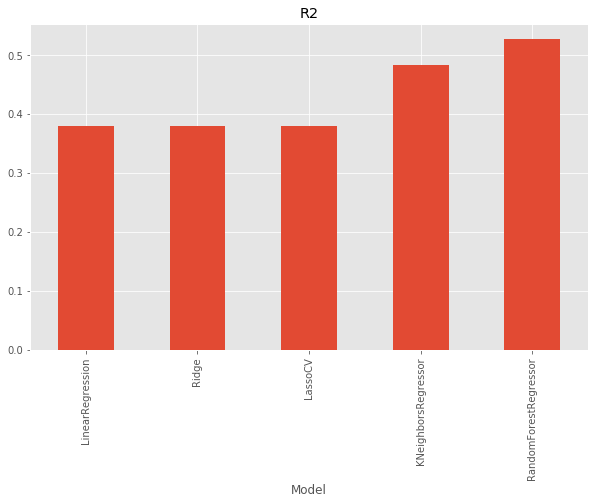

In [94]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 6))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2')
plt.show()

### For MSE: Random Forest performs better

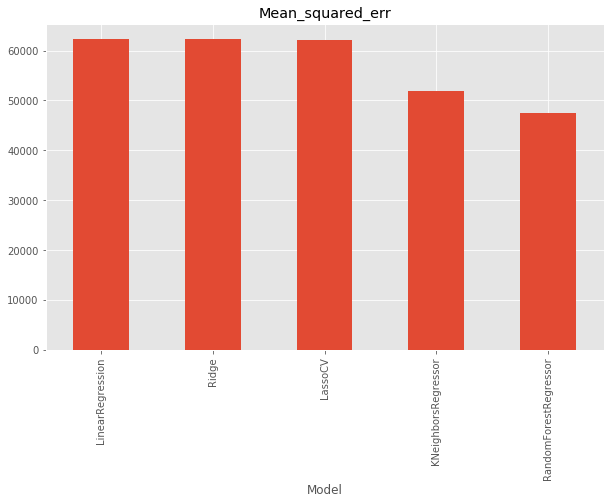

In [95]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 6))
TestModels.Mean_squared_err.plot(ax=axes, kind='bar', title='Mean_squared_err')
plt.show()

<a name="4"></a>
## 4. Neural Network

### Create function returning a compiled network, this helps to use scikit learn library for the Neural Networks

In [34]:
# Fore regression we limit the network to only one hidden layer,
# deeper networks doesn't necessarily improve the performance

def create_network(optimizer = 'adam'):
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(32, kernel_initializer = 'normal',input_dim = X_train.shape[1], activation = 'relu'))

    # The Hidden Layers :
    NN_model.add(Dense(16, kernel_initializer = 'normal',activation = 'relu'))
    NN_model.add(Dropout(0.3))
    
    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer = 'normal',activation = 'linear'))

    # Compile the network :
    NN_model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mse'])
    return NN_model

### Wrap function In Keras Regressor

In [35]:
# Wrap Keras model so it can be used by scikit-learn
estimator = KerasRegressor(build_fn = create_network, verbose = 0)

#### Different optimizers such as adam and rmsprop have different performances over different network layouts so we find the best network for each optimizer :

In [36]:
param_grid = {
    'batch_size':[16,32,64],
    'epochs':[100,200,400],
    'optimizer':['adam'] # I tried adam and sgd as well
}

estimator_grid = GridSearchCV(estimator, param_grid = param_grid, cv = 4)

start_time = time.time()

estimator_grid.fit(X_train, y_train, verbose=False)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))

print('best parameters are:', estimator_grid.best_params_)

best_NN = estimator_grid.best_estimator_ 

--- training time is 2532.4028775691986 seconds ---
best parameters are: {'batch_size': 16, 'epochs': 400, 'optimizer': 'adam'}


In [37]:
param_grid = {
    'batch_size':[16,32,64],
    'epochs':[100,200,300,400],
    'optimizer':['rmsprop'] # I tried adam and sgd as well
}

estimator_grid = GridSearchCV(estimator, param_grid = param_grid, cv = 4)

start_time = time.time()

estimator_grid.fit(X_train, y_train, verbose=0)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))

print('best parameters are:', estimator_grid.best_params_)

best_NN = estimator_grid.best_estimator_ 

--- training time is 2877.7796194553375 seconds ---
best parameters are: {'batch_size': 16, 'epochs': 400, 'optimizer': 'rmsprop'}


## Can we tune the Nueral network so that it performs as well as Random Forest or even better?
#### For each of the optimizers the best model are as below:

### adam 128 (rel), 32, Drop, bach=16, epoch 400  (0.4795) 

In [56]:
def create_network(optimizer = 'adam') :
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train.shape[1], activation = 'relu'))
   
    # The Hidden Layers :
    NN_model.add(Dense(32, kernel_initializer = 'normal', activation = 'linear'))
    NN_model.add(Dropout(0.3))
   
    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))

    # Compile the network :
    NN_model.compile(loss = ['mse'], optimizer = optimizer, metrics = ['mse'])
    return NN_model

# Wrap Keras model so it can be used by scikit-learn
estimator = KerasRegressor(build_fn = create_network, batch_size = 32, epochs = 400, verbose = 1)

In [57]:
seed = 7

start_time = time.time()

estimator.fit(X_train, y_train, verbose=0)
y_pred2 = estimator.predict(X_test)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))
print("R2-score: %.4f" % r2_score( y_test, y_pred2) )
print("MSE: %.4f" % mean_squared_error(y_test, y_pred2) )

2007/2007 [==============================] - 0s 59us/step
--- training time is 214.24331855773926 seconds ---
R2-score: 0.4712
MSE: 53055.6414


### rmsprop: 16 (Relu), 64 (Linear), drop (0.3), batch = 32, epoch = 200

In [48]:
def create_network(optimizer = 'rmsprop') :
    NN_model = Sequential()

    # The Input Layer :
    NN_model.add(Dense(128, kernel_initializer = 'normal', input_dim = X_train.shape[1], activation = 'relu'))
   
    # The Hidden Layers :
    NN_model.add(Dense(32, kernel_initializer = 'normal', activation = 'linear'))
    NN_model.add(Dropout(0.3))
   
    # The Output Layer :
    NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))

    # Compile the network :
    NN_model.compile(loss = ['mse'], optimizer = optimizer, metrics = ['mse'])
    return NN_model

# Wrap Keras model so it can be used by scikit-learn
estimator = KerasRegressor(build_fn = create_network, batch_size = 16, epochs = 400, verbose = 1)

In [49]:
seed = 7

start_time = time.time()

estimator.fit(X_train, y_train, verbose=0)
y_pred2 = estimator.predict(X_test)

end_time = time.time()

print("--- training time is %s seconds ---" % (end_time - start_time))
print("R2-score: %.4f" % r2_score( y_test, y_pred2) )
print("MSE: %.4f" % mean_squared_error(y_test, y_pred2) )

2007/2007 [==============================] - 0s 108us/step
--- training time is 426.87968373298645 seconds ---
R2-score: 0.4582
MSE: 54364.7173


In [54]:
def mean_absolute_percent_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#print('mean absolute error training data:',mean_absolute_percent_error(y_test, y_pred))
print('mean absolute error test data:',mean_absolute_percent_error(y_test, y_pred2))

mean absolute error test data: 69.17129271817971
